<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-22/Ycut2ndsample_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1140, done.
remote: Counting objects: 100% (430/430), done.
remote: Compressing objects: 100% (250/250), done.
remote: Total 1140 (delta 273), reused 274 (delta 175), pack-reused 710
Receiving objects: 100% (1140/1140), 66.18 MiB | 15.18 MiB/s, done.
Resolving deltas: 100% (642/642), done.
Updating files: 100% (153/153), done.


'/content'

### 18-07-24 LiTaO3 Ycut gating

Gate voltage parameters :
- Amp : 1Vpp
- Offset : 500 mV
- Duty Cycle : 75% and then 10%



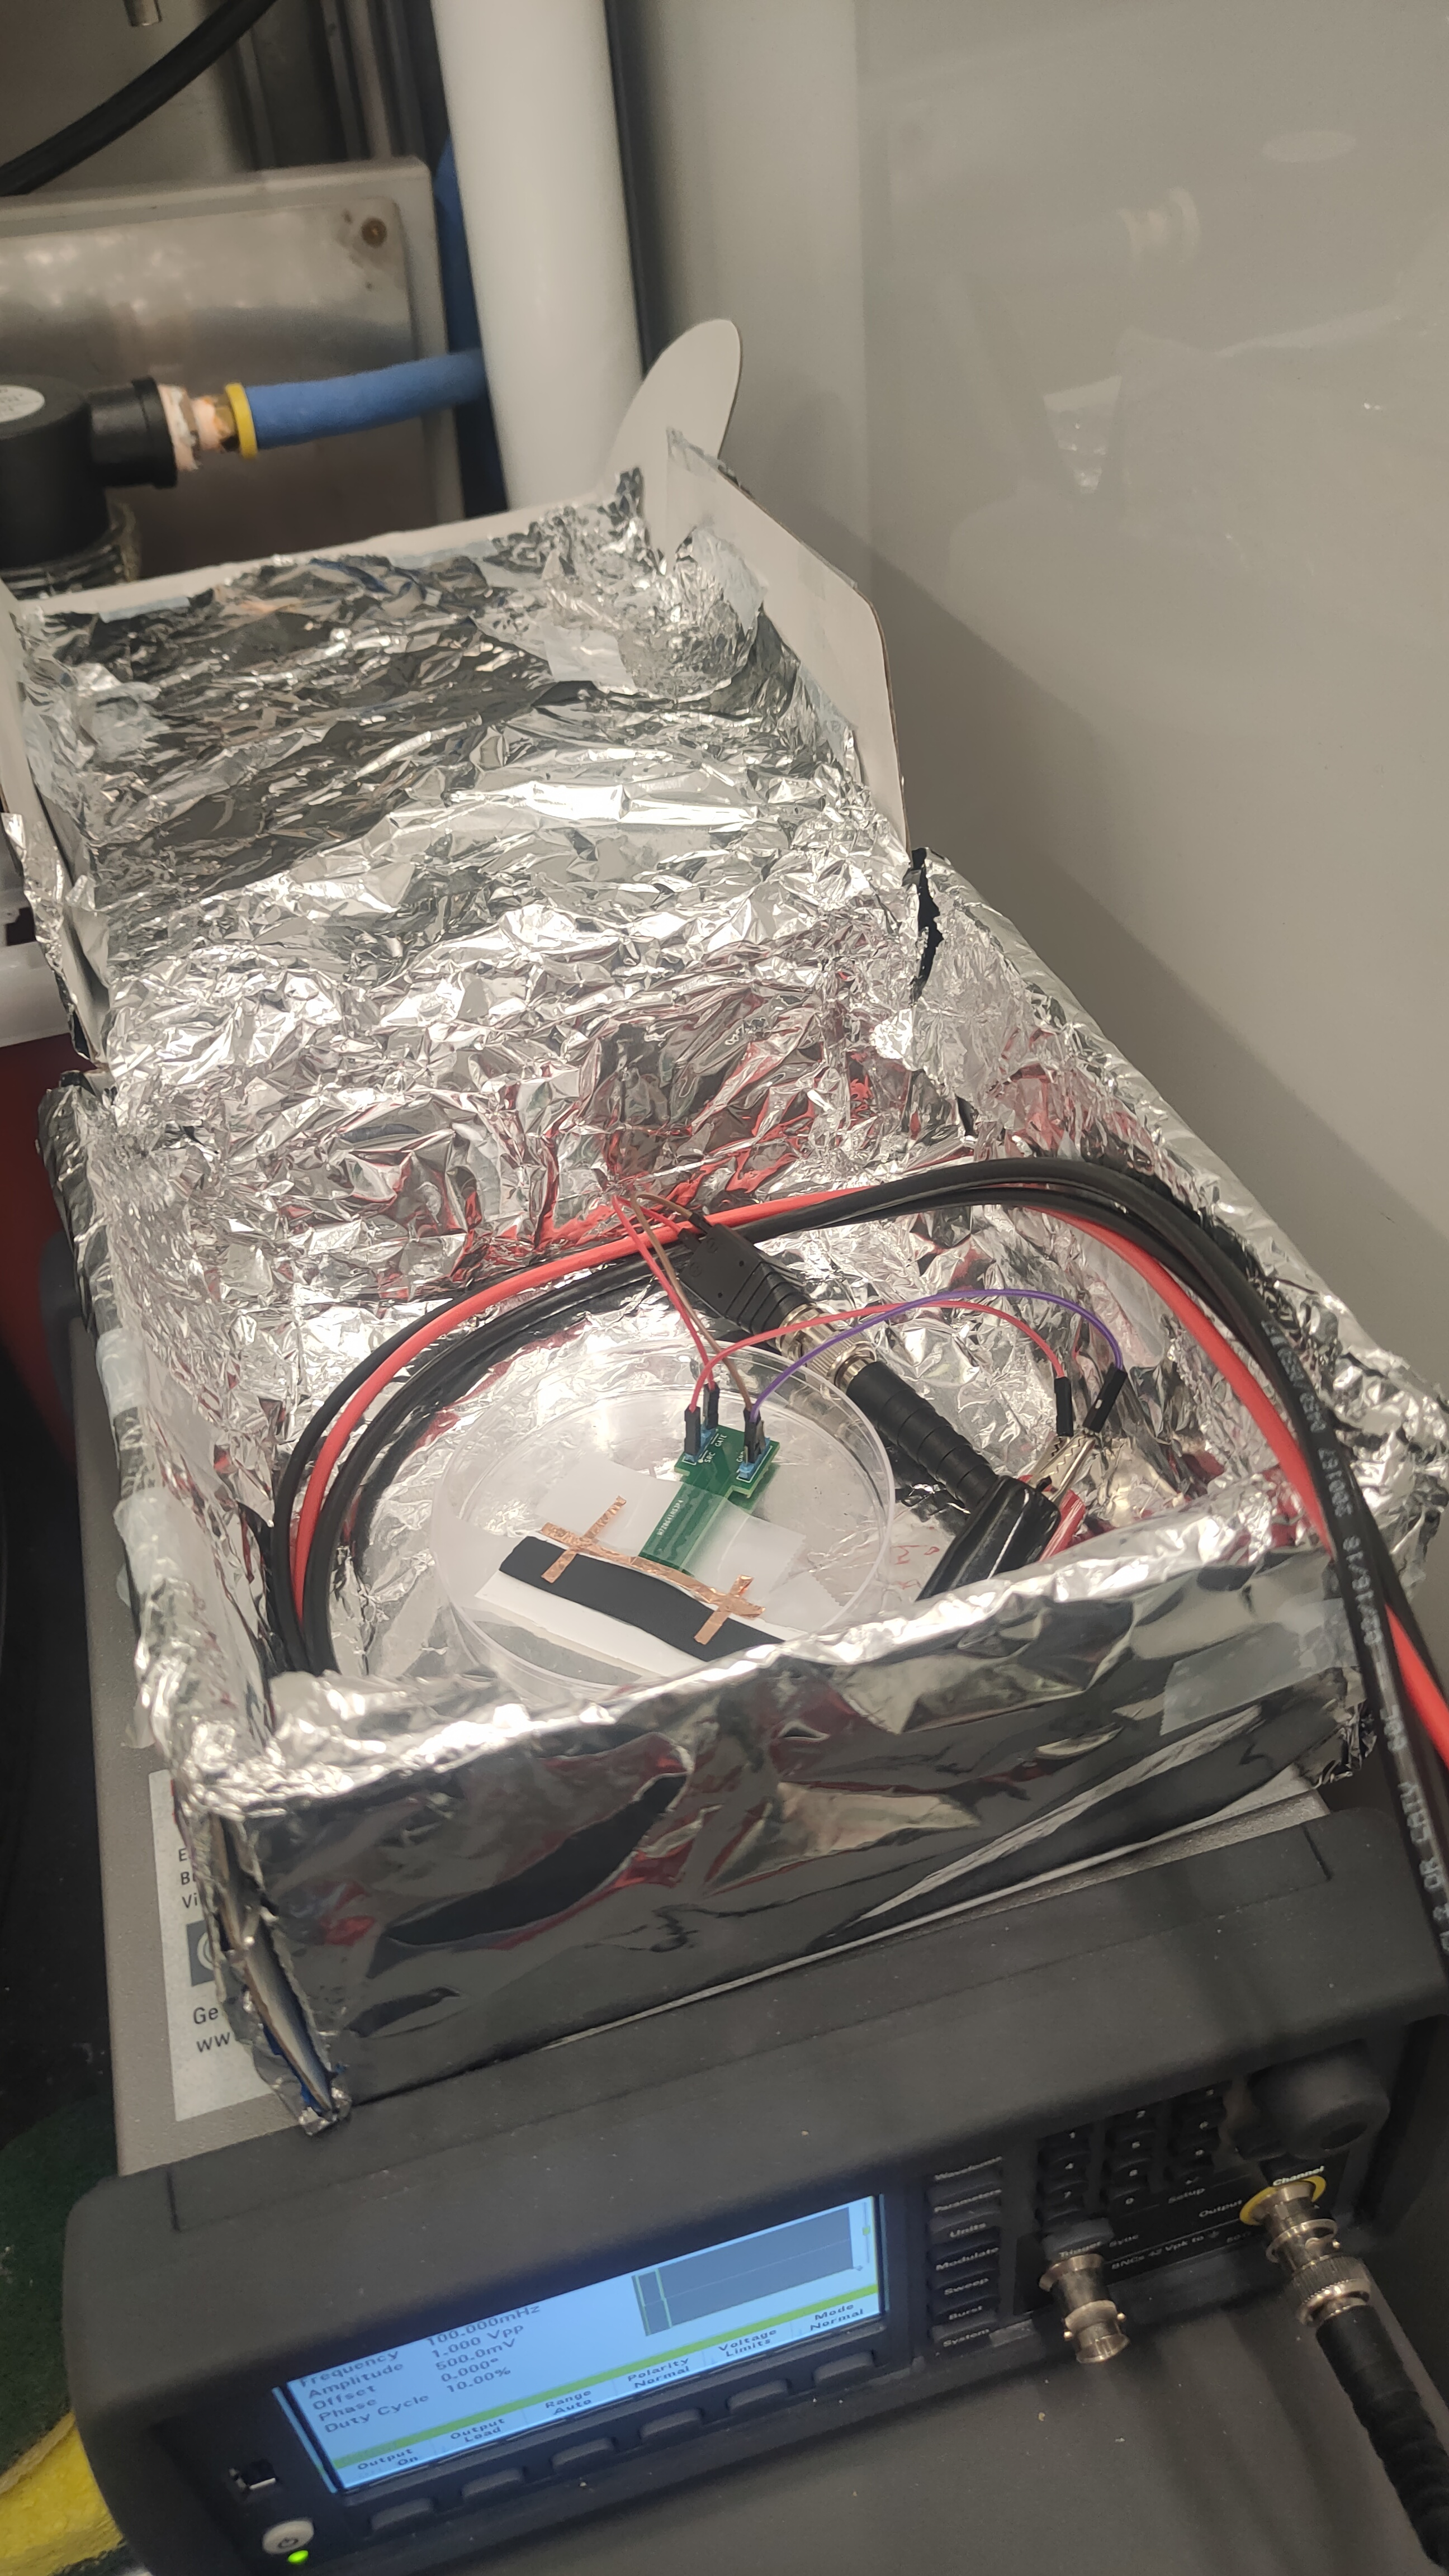

In [3]:
%cd "/content/gator/data/07-22/"

/content/gator/data/07-22


In [4]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [5]:
prep_csv('defbuffer1_0722_145121.csv')
df = pd.read_csv('defbuffer1_0722_145121.csv')


Fill Mode,1



In [6]:
df

Reading    Unit  Range Digits  Disp Digits Math Start Group  \
0      1.644423e-11  Amp DC  1.000000e-08          5.5    F           F   
1      1.319576e-11  Amp DC  1.000000e-07          5.5    F           F   
2     -2.993718e-11  Amp DC  1.000000e-07          5.5    F           F   
3      1.762510e-11  Amp DC  1.000000e-07          5.5    F           F   
4      1.849087e-11  Amp DC  1.000000e-08          5.5    F           F   
...             ...     ...           ...          ...  ...         ...   
48338 -1.445148e-11  Amp DC  1.000000e-08          5.5    F           F   
48339 -1.200788e-11  Amp DC  1.000000e-08          5.5    F           F   
48340 -1.542614e-11  Amp DC  1.000000e-08          5.5    F           F   
48341 -1.614321e-11  Amp DC  1.000000e-08          5.5    F           F   
48342 -1.165978e-11  Amp DC  1.000000e-08          5.5    F           F   

      Limit1 High Limit1 Low Limit2 High Limit2 Low  ... Questionable Origin  \
0               F          F           F          F  ...            F   Main   
1               F          F           F          F  ...            F   Main   
2               F          F           F          F  ...            F   Main   
3               F          F           F          F  ...            F   Main   
4               F          F           F          F  ...            F   Main   
...           ...        ...         ...        ...  ...          ...    ...   
48338           F          F           F          F  ...            F   Main   
48339           F          F           F          F  ...            F   Main   
48340           F          F           F          F  ...            F   Main   
48341           F          F           F          F  ...            F   Main   
48342           F          F           F          F  ...            F   Main   

          Value   Unit.1 Digits  Output Sense Source Limit Overtemp  \
0      0.000206  Volt DC   0.01       F    2W            F        F   
1      0.000003  Volt DC   0.01       F    2W            F        F   
2      0.000002  Volt DC   0.01       F    2W            F        F   
3      0.000002  Volt DC   0.01       F    2W            F        F   
4      0.000175  Volt DC   0.01       F    2W            F        F   
...         ...      ...    ...     ...   ...          ...      ...   
48338  0.000019  Volt DC   1.00       F    2W            F        F   
48339  0.000018  Volt DC   1.00       F    2W            F        F   
48340  0.000019  Volt DC   1.00       F    2W            F        F   
48341  0.000018  Volt DC   1.00       F    2W            F        F   
48342  0.000020  Volt DC   1.00       F    2W            F        F   

      Relative Time  
0          0.000000  
1          0.412629  
2          0.947624  
3          1.482568  
4          1.674240  
...             ...  
48338   4101.632959  
48339   4101.702294  
48340   4101.771641  
48341   4101.840967  
48342   4101.910300  

[48343 rows x 21 columns]

In [7]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e9

# Potential (mV)
V = df['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

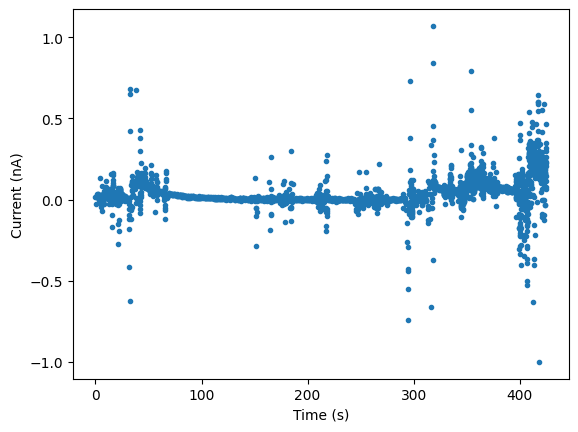

In [8]:
cut1 = 0
cut2 = 3000
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

In [11]:
# prompt: plot df with plotly express

import plotly.express as px

fig = px.scatter(df, x='Relative Time', y='Reading', title='Gator Data')
fig.show()


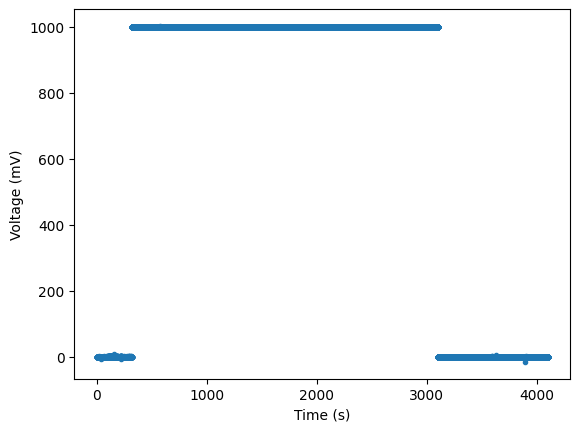

In [9]:
cut1 = 0
cut2 = None  # Set to None to include the entire array
plt.plot(T[cut1:cut2], V[cut1:cut2], '.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')
plt.show()